<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Kouchakzade

**Student ID**: 400101837



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [2]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [27]:
## Write your code here ##

"""Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]"""

data = pd.read_csv('./Q1/Boston.csv').to_numpy()
input = data[:,:13]
output = data[:,-1].reshape(-1,1)
X , y = minmax_scale(input) , output.copy()
m , n = X.shape
print(f'X shape : {X.shape}, Y shape : {y.shape}')

X shape : (506, 13), Y shape : (506, 1)


In [30]:
class MyLinearRegression() :
    def __init__(self,n) :
        self.__coef = np.zeros((n,1),dtype=np.float64)
        self.__intercept = 0
    

    def loss_metrics(self,y_true,y_pred, loss = False,type = 'ridge', alpha = 0):
        diff , m = (y_true - y_pred) ** 2 , y_true.shape[0]
        penalty = alpha * np.sum(self.__coef ** 2) / m if type == 'ridge' else alpha * np.sum(np.abs(self.__coef)) / m
        if loss: return np.mean(diff) + penalty
        return np.sqrt(np.mean(diff)) , (1 - np.sum(diff) / np.sum((y_true - np.mean(y_true)) ** 2))
    
    def gradinet_decent(self,X,y,y_pred,type='ridge',alpha = 0):
        diff = (y_pred - y).reshape(-1,)
        intercept , m = np.mean(diff) , X.shape[0]
        coef = np.array([2 * np.dot(diff,x_i) / m + (2 * alpha * self.__coef[indx]) / m if type == 'ridge' 
                         else 2 * np.dot(diff,x_i) / m + (alpha * np.sign(self.__coef[indx])) / m for indx,x_i in enumerate(X.T)]).reshape(-1,1)
        return coef , intercept
    
    def fit(self,X,y,max_epoch,learning_rate,type = 'ridge',alpha = 0,debug = False):
        # X : (m,n) m sample , feature ; y : (m,1)
        y_pred , prev_MSE = self.predict(X) , np.Inf
        for _ in range(max_epoch):
            coef , intercept = self.gradinet_decent(X,y,y_pred,type,alpha)
            self.__coef, self.__intercept = self.__coef - learning_rate * coef, self.__intercept - learning_rate * intercept
            y_pred , MSE = self.predict(X) , self.loss_metrics(y,y_pred,True,type,alpha)
            #if MSE > prev_MSE : print('learning rate is big') ; break
            if debug : print(MSE)
            diff = prev_MSE - MSE
            if np.abs(diff) < 1e-6 : break
            prev_MSE = MSE
        if _ == max_epoch - 1 : print(f'max epoch reached , type = {type} , alpha = {alpha} , last diff = {diff}')
    
    def predict(self,X):
        return X @ self.__coef + self.__intercept
    
    def predict_metrics(self,X,y):
        y_pred = X @ self.__coef + self.__intercept
        RMSE , R2 = self.loss_metrics(y,y_pred)
        return y_pred , RMSE , R2
    
    def get_coef(self):
        return self.__coef
    
    def get_intercept(self):
        return self.__intercept

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [15]:
## Write your code here ##

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 , random_state = 40)

reg = MyLinearRegression(n)
reg.fit(X_train,y_train,10000,0.3)
y_train_predict , RMSE_train , R2_train = reg.predict_metrics(X_train,y_train)
y_test_predict , RMSE_test , R2_test = reg.predict_metrics(X_test,y_test)

print(f'''RMSE of Train Data : {RMSE_train:.3f}
RMSE of Test Data : {RMSE_test:.3f}
R2 for Train Data : {R2_train:.3f}
R2 for Test data : {R2_test:.3f}''')

equation = 'y = ' + ' + '.join([f'{coef:.2f}x{i}' for i, coef in enumerate(reg.get_coef()[:,0])]) + f' + {reg.get_intercept():.2f}'
print(equation)

RMSE of Train Data : 4.385
RMSE of Test Data : 5.824
R2 for Train Data : 0.750
R2 for Test data : 0.701
y = -11.17x0 + 4.20x1 + -0.29x2 + 2.72x3 + -7.74x4 + 20.87x5 + -0.40x6 + -14.71x7 + 6.56x8 + -6.17x9 + -8.34x10 + 2.41x11 + -18.94x12 + 26.69


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10 ** np.linspace (3,-3,100) *0.5$$

for alpha = 0.147 the error = 33.89108038037716 is min.
for alpha = 31.623 the error = 0.4548162298643059 is min.


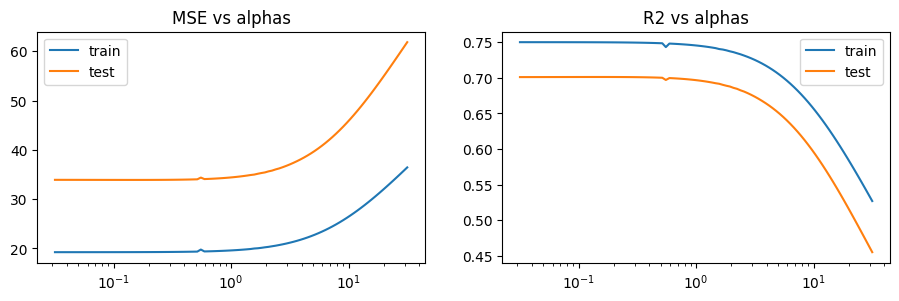

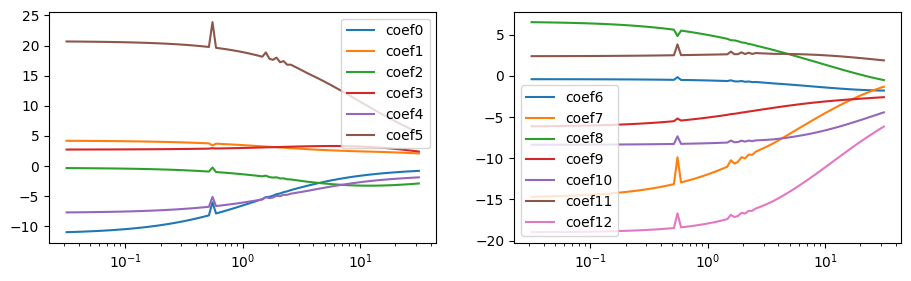

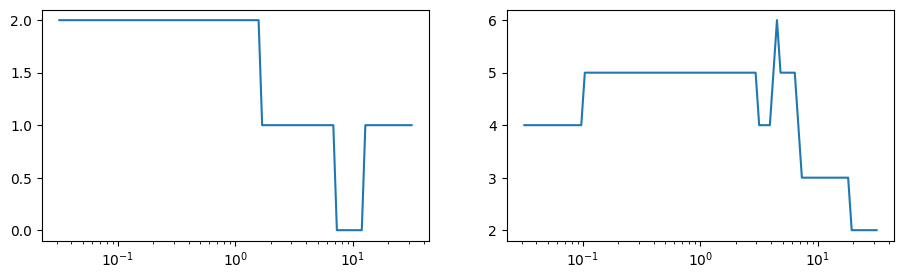

In [19]:
## Write your code here ##
num = 100
alphas = 10 ** (np.linspace(-3,3,num) * 0.5)
RMSE_history_train , RMSE_history_test = np.array([]) , np.array([])
R2_history_train , R2_history_test = np.array([]) , np.array([])
coef_history = np.zeros((n,num))
for indx,alpha in enumerate(alphas):
    reg = MyLinearRegression(n)
    reg.fit(X_train,y_train,10000,0.3,'ridge',alpha)
    y_train_predict , RMSE_train , R2_train = reg.predict_metrics(X_train,y_train)
    y_test_predict , RMSE_test , R2_test = reg.predict_metrics(X_test,y_test)
    RMSE_history_train , RMSE_history_test = np.append(RMSE_history_train,RMSE_train) , np.append(RMSE_history_test,RMSE_test)
    R2_history_train , R2_history_test = np.append(R2_history_train,R2_train) , np.append(R2_history_test,R2_test)
    coef_history[:,indx] = reg.get_coef().squeeze()

def plot_semilog(X,Y1,Y2,title,i):
    plt.subplot(1,2,i)
    plt.title(f'{title} vs alphas')
    plt.semilogx(X,Y1,label = 'train')
    plt.semilogx(X,Y2,label = 'test')
    print(f'for alpha = {X[np.argmin(Y2)]:.3f} the error = {np.min(Y2)} is min.')
    plt.legend()

plt.figure(figsize=(11,3))
plot_semilog(alphas,RMSE_history_train**2,RMSE_history_test**2,'MSE',1)
plot_semilog(alphas,R2_history_train,R2_history_test,'R2',2)

plt.figure(figsize=(11,3))
for i in range(2):
    plt.subplot(1,2,i + 1)
    for j in range(6):
        plt.semilogx(alphas,coef_history[6*i+j,:],label = f'coef{6*i+j}')
    plt.legend()
plt.semilogx(alphas,coef_history[12,:],label = f'coef{12}')
plt.legend()

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.1 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.subplot(1,2,2)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.2 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

In [33]:
reg = MyLinearRegression(n)
reg.fit(X_train,y_train,600,0.1,'lasso',1,True)

591.9861931142893
175.31366171973815
115.97389707725034
102.35902962488348
95.23873906444405
89.58840437650204
84.69236737810165
80.3876116149205
76.59004674315003
73.23375387419001
70.26302683291263
67.62876404678833
65.28923016905533
63.2056007198248
61.34582512360491
59.68113475605326
58.18724389237871
56.842901252672725
55.62899972896271
54.529365076890286
53.52990525130025
52.61852561747739
51.78434344219108
51.01818244367601
50.31169410759943
49.657795113474634
49.05030744400083
48.48384124922964
47.95369293124917
47.455756444097666
46.98644609009327
46.5426293208398
46.121568245439434
45.72086871690023
45.33843601418989
44.97243626481515
44.62126286369529
44.2835072406037
43.957933412440624
43.6434558296979
43.33912009009543
43.04408614773811
42.75761369433144
42.47904943093428
42.20781598522972
41.943402261063675
41.6853550346499
41.43327163590487
41.186793574318884
40.94583502705717
40.70995023103818
40.47911023077834
40.25276968020438
40.03072088244325
39.81277617980167
39.59

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

max epoch reached , type = lasso , alpha = 17.012542798525857 , last diff = 0.0013818392777835697
max epoch reached , type = lasso , alpha = 22.854638641349883 , last diff = -0.0034986364803550885
max epoch reached , type = lasso , alpha = 30.702906297578497 , last diff = -0.007655164364898326
max epoch reached , type = lasso , alpha = 41.24626382901348 , last diff = -0.017388110770976795
max epoch reached , type = lasso , alpha = 55.41020330009481 , last diff = -0.05950113895472953
max epoch reached , type = lasso , alpha = 74.43803013251681 , last diff = -0.16765924297197898
max epoch reached , type = lasso , alpha = 100.0 , last diff = -0.5437597419758973
for alpha = 0.001 the error = 33.91622948383172 is min.
for alpha = 100.000 the error = 0.5911369411662319 is min.


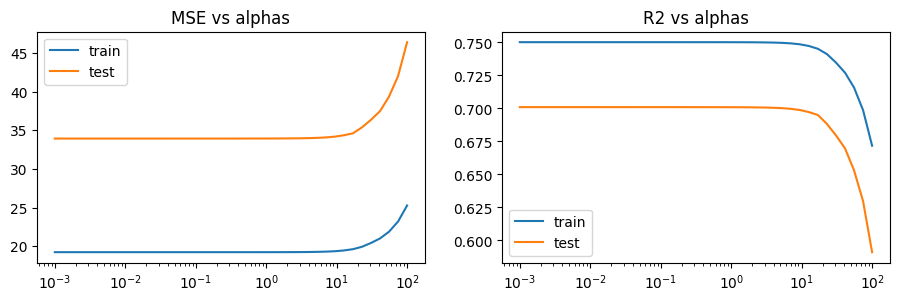

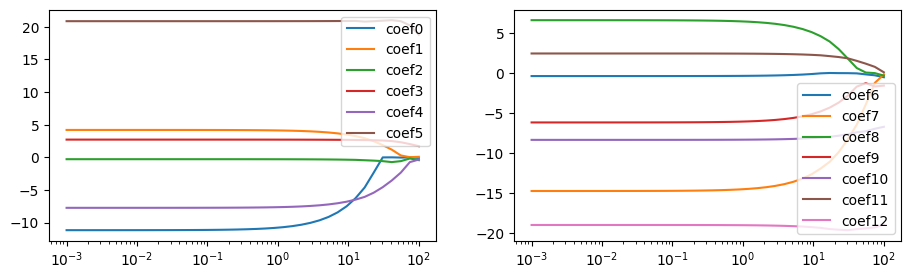

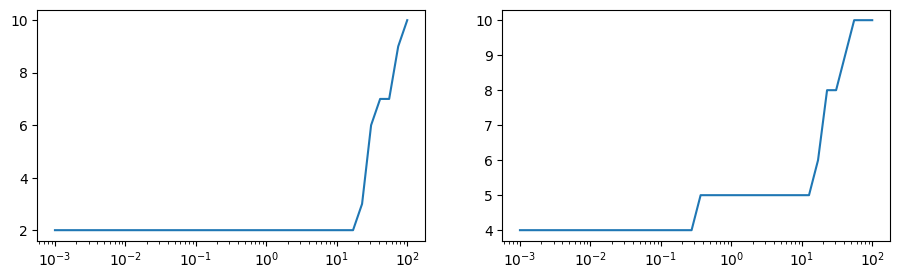

In [40]:
## Write your code here ##

num = 40
alphas = 10 ** (np.linspace(-6,4,num) * 0.5)
RMSE_history_train , RMSE_history_test = np.array([]) , np.array([])
R2_history_train , R2_history_test = np.array([]) , np.array([])
coef_history = np.zeros((n,num))
for indx,alpha in enumerate(alphas):
    reg = MyLinearRegression(n)
    reg.fit(X_train,y_train,80000,0.3,'lasso',alpha)
    y_train_predict , RMSE_train , R2_train = reg.predict_metrics(X_train,y_train)
    y_test_predict , RMSE_test , R2_test = reg.predict_metrics(X_test,y_test)
    RMSE_history_train , RMSE_history_test = np.append(RMSE_history_train,RMSE_train) , np.append(RMSE_history_test,RMSE_test)
    R2_history_train , R2_history_test = np.append(R2_history_train,R2_train) , np.append(R2_history_test,R2_test)
    coef_history[:,indx] = reg.get_coef().squeeze()

def plot_semilog(X,Y1,Y2,title,i):
    plt.subplot(1,2,i)
    plt.title(f'{title} vs alphas')
    plt.semilogx(X,Y1,label = 'train')
    plt.semilogx(X,Y2,label = 'test')
    print(f'for alpha = {X[np.argmin(Y2)]:.3f} the error = {np.min(Y2)} is min.')
    plt.legend()

plt.figure(figsize=(11,3))
plot_semilog(alphas,RMSE_history_train**2,RMSE_history_test**2,'MSE',1)
plot_semilog(alphas,R2_history_train,R2_history_test,'R2',2)

plt.figure(figsize=(11,3))
for i in range(2):
    plt.subplot(1,2,i + 1)
    for j in range(6):
        plt.semilogx(alphas,coef_history[6*i+j,:],label = f'coef{6*i+j}')
    plt.legend()
plt.semilogx(alphas,coef_history[12,:],label = f'coef{12}')
plt.legend()

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.1 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.subplot(1,2,2)
plt.semilogx(alphas,np.sum(np.abs(coef_history) < 0.2 * np.max(np.abs(coef_history),axis=0),axis=0))
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

In [ ]:
## Write you code here ##